In [15]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from scipy.integrate import odeint

In [16]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2 , k3 , L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-y1*b1 - k1 * (x1 - L1) - k2 * ( x1 + L2 - x2 )) / m1,
         y2,
         (-y2*b2 - k3 * ( x2 - L2 -L1) - k2 * ( x2 - L2 - x1 ))/ m2] 
    
    
    
    
    #[y1 , (-k1*(x1-L1)-k2*(-L1+x1+(L2-x2)))/ m1,
    #     y2,
    #     (-k3*(x2-L2)-k2*(-L2+x2+L1-x1))/ m2]
    return f

In [17]:

# Parameter values
# Masses:
m1 = 1.0
m2 = 1
# Spring constants
k1 = 1
k2 = 1
k3 = 1
# Natural lengths
L1 = 1
L2 = 1.0
# Friction coefficients
b1 = 0.3
b2 = 0.7

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1
y1 = 3
x2 = 0.5
y2 = 4

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, k3 , L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


for t1, w1 in zip(t, wsol):
    print(t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a"))

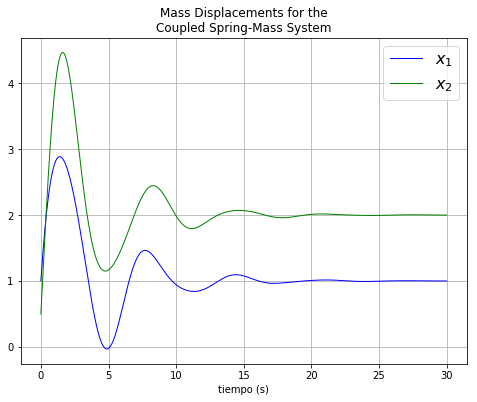

In [18]:
t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(8, 6))

xlabel('tiempo (s)')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs.png', dpi=100)